# Programmierbeispiele

## Inhalt
* [Primzahlzwillinge](#Primzahlzwillinge)
* [Betrag](#Betrag)
* [G-adische Darstellung](#G-adische-Darstellung)
* [Ausflug: Cython -  oder wie ich Sage Geschwindigkeit beibringe](#Ausflug:-Cython---oder-wie-ich-Sage-Geschwindigkeit-beibringe)


### Primzahlzwillinge
Primzahlzwillinge nennt man zwei Primzahlen $p_1$ und $p_2$, deren Differenz $p_2- p_1 =2$ ist.  

In [1]:
[(zahl, zahl+2) for zahl in [1..100] if is_prime(zahl) and is_prime((zahl+2))]

[(3, 5), (5, 7), (11, 13), (17, 19), (29, 31), (41, 43), (59, 61), (71, 73)]

In [2]:
def primZaZwi (N):
    T = []
    anz = 0
    for i in [2..N]:
        if (is_prime(i) and is_prime(i+2)):
            anz += 1
            T.append([i,i+2])
    return anz,T

In [3]:
primZaZwi(200)

(15,
 [[3, 5],
  [5, 7],
  [11, 13],
  [17, 19],
  [29, 31],
  [41, 43],
  [59, 61],
  [71, 73],
  [101, 103],
  [107, 109],
  [137, 139],
  [149, 151],
  [179, 181],
  [191, 193],
  [197, 199]])

In [4]:
primList = [[i,i+2] for i in [2..200] if (is_prime(i) and is_prime(i+2))]; len(primList),primList

(15,
 [[3, 5],
  [5, 7],
  [11, 13],
  [17, 19],
  [29, 31],
  [41, 43],
  [59, 61],
  [71, 73],
  [101, 103],
  [107, 109],
  [137, 139],
  [149, 151],
  [179, 181],
  [191, 193],
  [197, 199]])

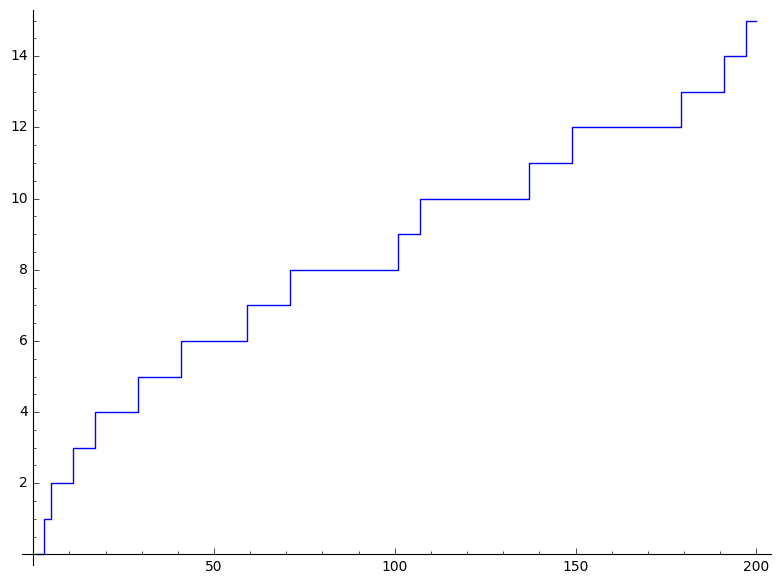

In [5]:
plot_step_function([(i,primZaZwi(i)[0]) for i in [1..200]])

### Betrag
Berechnung des <strong>Betrages</strong> $abs(x)$ f&uuml;r $\mathbb{Z}$, $\mathbb{Q}$, $\mathbb{R}$ und $\mathbb{C}$  

In [6]:
def betrag(a):
    if a in ZZ or a in QQ or a in RR:
        if a>0:
            y = a
        else:
            y = -a
    elif a in CC:
        y = sqrt(real(a)^2+imag(a)^2)
    else:
        return 'Falscher Eingabetyp'
    return y
betrag([1,2]), betrag(2+I*2)

('Falscher Eingabetyp', 2*sqrt(2))

### G-adische Darstellung
Berechnung der Darstellung einer nat&uuml;rlichen Zahl x zur Basis b. R&uuml;ckgabe des Ergebnis als Liste.  

In [7]:
def Gadisch(x,basis):
    """Berechnung der Darstellung einer natuerlichen Zahl 
x zur Basis b. Rueckgabe des Ergebnis als Liste!"""
    #Abfangen der Eingabe
    if not x in ZZ or x < 0 or basis==1: 
        return 'Eingabe nicht korrekt!'
    T = []  # leere Liste 
    while x>0:
        T.append(x%basis) # Rest der Division
        print ('{} : {} = {} Rest {}'.format(x,basis,floor(x/basis),x%basis))
        x = floor(x/basis) # Teiler setzen
    # Rueckgabe der Liste
    return T

In [8]:
floor(-4.4), ceil(-4.4)

(-5, -4)

In [9]:
Gadisch(6,2)

6 : 2 = 3 Rest 0
3 : 2 = 1 Rest 1
1 : 2 = 0 Rest 1


[0, 1, 1]

In [10]:
Gadisch(3.4,2)

'Eingabe nicht korrekt!'

### Ausflug: Cython - oder wie ich Sage numerische Geschwindigkeit beibringe

In [11]:
%load_ext cython

In [12]:
%%cython
def cython_mandel(double x,double y):
    cdef double z_real = 0.
    cdef double z_imag = 0.
    cdef int i
    cdef int max_iterations=50
    for i in range(0, max_iterations):
        z_real, z_imag = ( z_real*z_real - z_imag*z_imag + x,2*z_real*z_imag + y )
        if (z_real*z_real + z_imag*z_imag) >= 4:
            return i
    return max_iterations

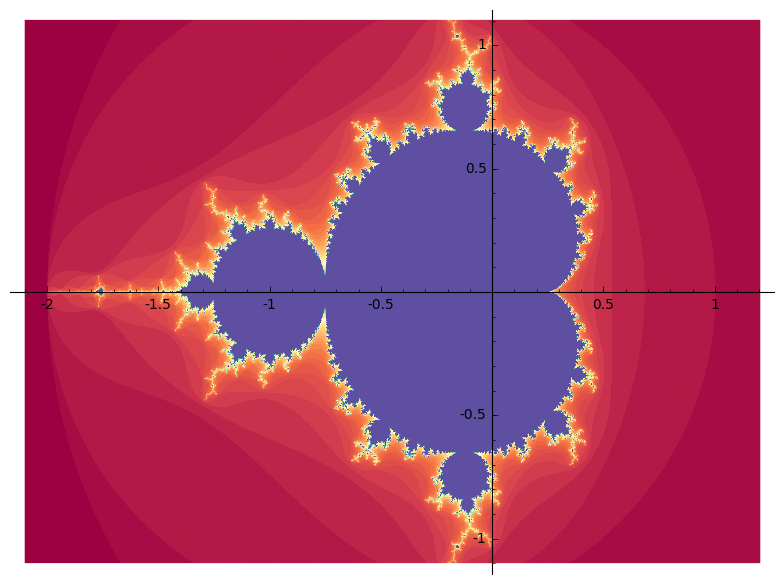

In [13]:
density_plot (cython_mandel , ( -2.1 ,1.2) , ( -1.1 ,1.1) , plot_points=2000,cmap='Spectral')